
<div style="text-align: center;">
    <h1 style="font-size: 24px;">DATA ANALYSIS FOR INSURANCE COST</h1>
    <h3 style="font-size: 14px;">Luis Eduardo Mauricio Álvarez</h3>
</div>


---

## Introduction

In this project, we aim to analyze insurance costs using a specific dataset. The analysis will involve cleaning the data, performing exploratory data analysis (EDA), and developing predictive models to understand the factors that influence insurance charges. This work seeks to demonstrate skills in data manipulation, analysis, and model development, 
highlighting the ability to derive meaningful insights from complex datasets.

## Objectives

1. **Load Data**: Import the dataset into a `pandas` DataFrame.
2. **Clean Data**: Fix or remove incorrect or missing entries.
3. **Exploratory Data Analysis (EDA)**: Identify key factors that impact `charges`.
4. **Model Development**: Create linear regression models to predict `charges`.
5. **Model Refinement**: Enhance models' accuracy with Ridge regression.

## Setup

The analysis will utilize several Python libraries:

- `pandas` for data management.
- `numpy` for mathematical operations.
- `sklearn` for machine learning and pipeline functions.
- `seaborn` and `matplotlib` for data visualization.

## Dataset Description

Below is a description of the dataset parameters used in this analysis:

| Parameter       | Description                        | Content Type         |
|-----------------|------------------------------------|----------------------|
| `age`           | Age in years                       | integer              |
| `gender`        | Male or Female                     | integer (1 or 2)     |
| `bmi`           | Body Mass Index                    | float                |
| `no_of_children`| Number of children                 | integer              |
| `smoker`        | Whether smoker or not              | integer (0 or 1)     |
| `region`        | Which US region - NW, NE, SW, SE   | integer (1,2,3,4)    |
| `charges`       | Annual Insurance charges in USD    | float                |

### Importing Required Libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

### Download the dataset
Run the cell below to load the dataset to this notebook environment.

In [38]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

## 1 | Import the dataset

Load the dataset into a `pandas` DataFrame, observing that the CSV file lacks headers.

Display the first 10 rows of the DataFrame to verify it has been loaded correctly.

In [39]:
df = pd.read_csv(path, header=None)
print(df.head(10))

    0  1       2  3  4  5            6
0  19  1  27.900  0  1  3  16884.92400
1  18  2  33.770  1  0  4   1725.55230
2  28  2  33.000  3  0  4   4449.46200
3  33  2  22.705  0  0  1  21984.47061
4  32  2  28.880  0  0  1   3866.85520
5  31  1  25.740  0  ?  4   3756.62160
6  46  1  33.440  1  0  4   8240.58960
7  37  1  27.740  3  0  1   7281.50560
8  37  2  29.830  2  0  2   6406.41070
9  60  1  25.840  0  0  1  28923.13692


Add the headers to the dataframe.

In [40]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers

Now, replace the '?' entries with 'NaN' values.

In [41]:
df.replace('?', np.nan, inplace = True)

In [42]:
print(df.head(10))

  age  gender     bmi  no_of_children smoker  region      charges
0  19       1  27.900               0      1       3  16884.92400
1  18       2  33.770               1      0       4   1725.55230
2  28       2  33.000               3      0       4   4449.46200
3  33       2  22.705               0      0       1  21984.47061
4  32       2  28.880               0      0       1   3866.85520
5  31       1  25.740               0    NaN       4   3756.62160
6  46       1  33.440               1      0       4   8240.58960
7  37       1  27.740               3      0       1   7281.50560
8  37       2  29.830               2      0       2   6406.41070
9  60       1  25.840               0      0       1  28923.13692


## 2 | Data Wrangling

Use dataframe.info() to identify the columns that have some 'Null' (or NaN) information

In [43]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


Handle missing data:

- For **continuous attributes** (e.g., age), replace missing values with the mean.
- For **categorical attributes** (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using `df.info()`.

In [44]:
# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int32  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int32  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.1 KB
None


Additionally, take into account that the `charges` column contains values with more than 2 decimal places. Adjust the `charges` column to round all values to the nearest 2 decimal places.

In [45]:
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())

   age  gender     bmi  no_of_children  smoker  region   charges
0   19       1  27.900               0       1       3  16884.92
1   18       2  33.770               1       0       4   1725.55
2   28       2  33.000               3       0       4   4449.46
3   33       2  22.705               0       0       1  21984.47
4   32       2  28.880               0       0       1   3866.86


## 3 | Exploratory Data Analysis (EDA)

Implement the regression plot for `charges` with respect to `bmi`.

(0.0, 66902.85800000001)

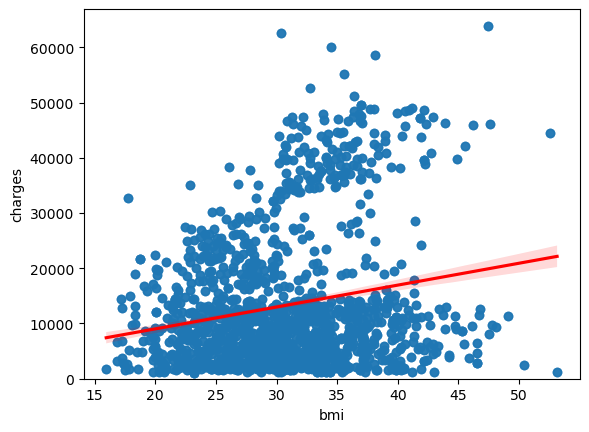

In [46]:
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

Implement the box plot for charges with respect to smoker.

<Axes: xlabel='smoker', ylabel='charges'>

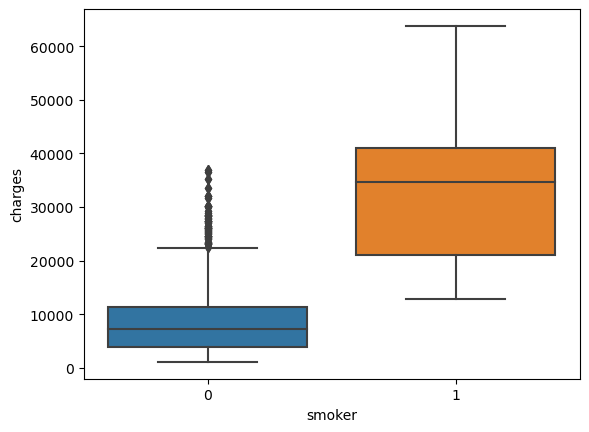

In [47]:
sns.boxplot(x="smoker", y="charges", data=df)

Print the correlation matrix for the dataset

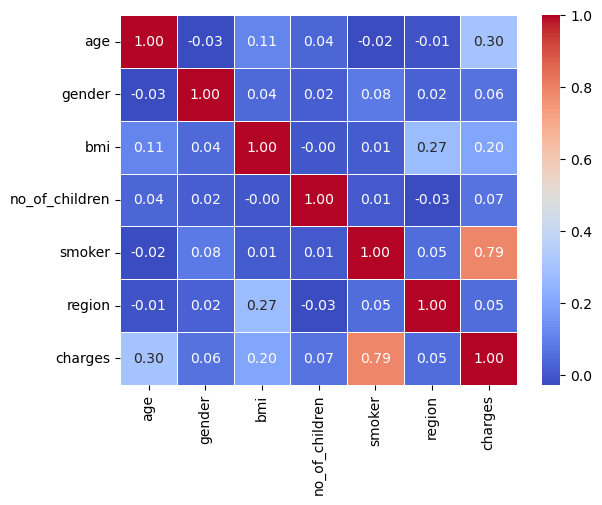

In [48]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

## 4 | Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.

In [49]:
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))

0.6221791733924185


Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. Print the $ R^2 $ score of this model. You should see an improvement in the performance.

In [50]:
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))

0.7504083820289634


In [51]:
#0   19       1  27.900               0       1       3  16884.9
# Create a DataFrame with the values for which you want to make the prediction
value_df = pd.DataFrame({
    'age': [19],
    "gender": [1],
    "bmi": [27.900],
    "no_of_children": [0],
    "smoker": [1],
    "region": [3]
})

# Make the prediction with the fitted model using all the features
predicted_charges = lm.predict(value_df)

# Print the predicted value
print(f"Predicted charges: ${predicted_charges[0]:.2f}")


Predicted charges: $25652.47


Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset. There should be even further improvement in the performance.

In [52]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))

0.8452456286532801


In [53]:
#0   19       1  27.900               0       1       3  16884.9
# Create a DataFrame with the values for which you want to make the prediction
value_df = pd.DataFrame({
    'age': [19],
    "gender": [1],
    "bmi": [27.900],
    "no_of_children": [0],
    "smoker": [1],
    "region": [3]
})

# Make the prediction with the fitted model using all the features
predicted_charges = pipe.predict(value_df)

# Print the predicted value
print(f"Predicted charges: ${predicted_charges[0]:.2f}")


Predicted charges: $23862.50


## 5 | Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.

In [54]:
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.

In [55]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel=Ridge(alpha=0.01)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6760609716432373


In [56]:
#0   19       1  27.900               0       1       3  16884.9
# Create a DataFrame with the values for which you want to make the prediction
value_df = pd.DataFrame({
    'age': [19],
    "gender": [1],
    "bmi": [27.900],
    "no_of_children": [0],
    "smoker": [1],
    "region": [3]
})

# Make the prediction with the fitted model using all the features
predicted_charges = RidgeModel.predict(value_df)

# Print the predicted value
print(f"Predicted charges: ${predicted_charges[0]:.2f}")

Predicted charges: $25676.89


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.

In [57]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7835898330434792


In [58]:
#0   19       1  27.900               0       1       3  16884.9
# Create a DataFrame with the values for which you want to make the prediction
value_df = pd.DataFrame({
    'age': [19],
    "gender": [1],
    "bmi": [27.900],
    "no_of_children": [0],
    "smoker": [1],
    "region": [3]
})

# Assuming 'pr' is your instance of PolynomialFeatures already initialized
value_df_pr = pr.transform(value_df)


In [59]:
# Predecir el valor de 'charges' para el nuevo conjunto de valores de parámetros
predicted_charges = RidgeModel.predict(value_df_pr)

# Imprimir el valor predicho
print(f"Predicted charges: ${predicted_charges[0]:.2f}")

Predicted charges: $24138.11
